In [27]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Visualization ##

## Scatter Plots ##

actors:

- Actor: Name of actor
- Total Gross: Total gross domestic box office receipt, in millions of dollars, of all of the actor’s movies
- Number of Movies: The number of movies the actor has been in
- Average per Movie: Total gross divided by number of movies
- #1 Movie : The highest grossing movie the actor has been in 
- Gross: Gross domestic box office receipt, in millions of dollars, of the actor’s #1 Movie

In [29]:
actors = pd.read_csv('actors.csv')

In [31]:
actors

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
0,Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
3,Tom Hanks,4340.8,44,98.7,Toy Story 3,415.0
4,"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
5,Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
6,Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
7,Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
8,Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
9,Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


<AxesSubplot:xlabel='Number of Movies', ylabel='Total Gross'>

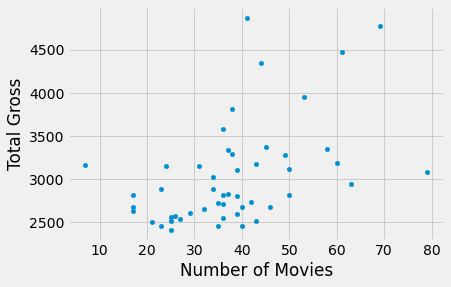

In [32]:
actors.plot.scatter('Number of Movies', 'Total Gross')

Plot shows an association between the variables, and that the association is positive: high values of one variable tend to be associated with high values of the other, and low values of one with low values of the other, in general.

Of course there is some variability. Some actors have high numbers of movies but average total gross receipts. Others have average numbers of movies but high receipts. That the association is positive is simply a statement about the broad general trend.

<AxesSubplot:xlabel='Number of Movies', ylabel='Average per Movie'>

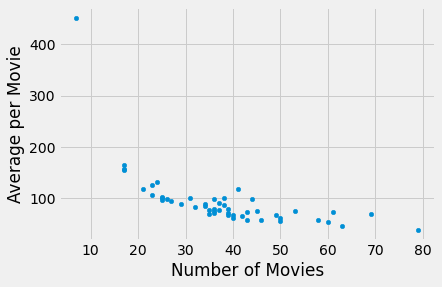

In [33]:
actors.plot.scatter('Number of Movies', 'Average per Movie')

This is a markedly different picture and shows a negative association. In general, the more movies an actor has been in, the less the average receipt per movie.

Outlier: Also, one of the points is quite high and off to the left of the plot. It corresponds to one actor who has a low number of movies and high average per movie. This point is an outlier. It lies outside the general range of the data. Indeed, it is quite far from all the other points in the plot. Who is this outlier:

In [34]:
actors[actors['Average per Movie']> 400]

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
14,Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


Anthony Daniels??
![title](https://upload.wikimedia.org/wikipedia/en/thumb/5/5c/C-3PO_droid.png/220px-C-3PO_droid.png)

Let’s zoom in on the main body of the plot by just looking at the portion that doesn’t have the outlier:

<AxesSubplot:xlabel='Number of Movies', ylabel='Average per Movie'>

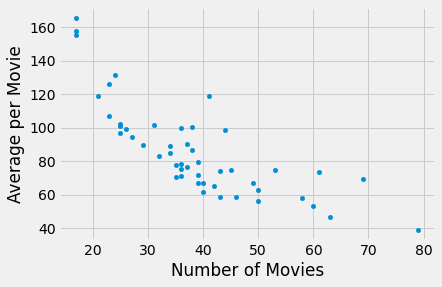

In [35]:
no_outlier = actors[actors['Number of Movies'] >10]
no_outlier.plot.scatter('Number of Movies', 'Average per Movie')

The negative association is still clearly visible. Let’s identify the actors corresponding to the points that lie on the right hand side of the plot where the number of movies is large:

In [36]:
actors[actors['Number of Movies'] > 60]

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
19,Robert DeNiro,3081.3,79,39.0,Meet the Fockers,279.3
21,Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


## Line Graphs

movies_by_year

- Year: Year
- Total Gross: Total domestic box office gross, in millions of dollars, of all movies released
- Number of Movies: Number of movies released
- #1 Movie: Highest grossing movie

In [37]:
movies_by_year = pd.read_csv('movies_by_year.csv')
movies_by_year

,Year,Total Gross,Number of Movies,#1 Movie
0,2015,11128.5,702,Star Wars: The Force Awakens
1,2014,10360.8,702,American Sniper
2,2013,10923.6,688,Catching Fire
3,2012,10837.4,667,The Avengers
4,2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
5,2010,10565.6,536,Toy Story 3
6,2009,10595.5,521,Avatar
7,2008,9630.7,608,The Dark Knight
8,2007,9663.8,631,Spider-Man 3
9,2006,9209.5,608,Dead Man's Chest


<AxesSubplot:xlabel='Year'>

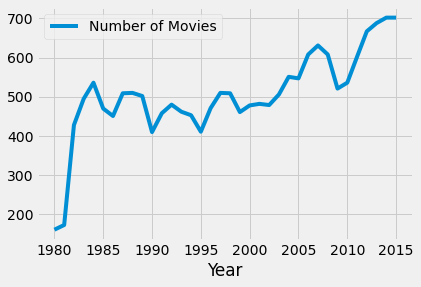

In [38]:
movies_by_year.plot('Year', 'Number of Movies')

<AxesSubplot:xlabel='Year'>

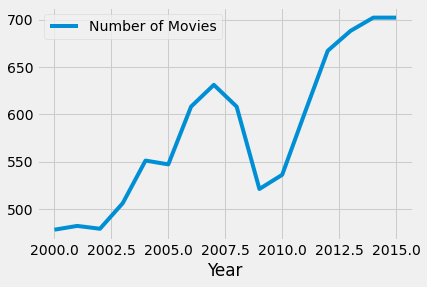

In [40]:
century_21 = movies_by_year[movies_by_year['Year'] >1999]
century_21.plot('Year', 'Number of Movies')

The global financial crisis of 2008 has a visible effect – in 2009 there is a sharp drop in the number of movies released.

The dollar figures, however, didn’t suffer much:

<AxesSubplot:xlabel='Year'>

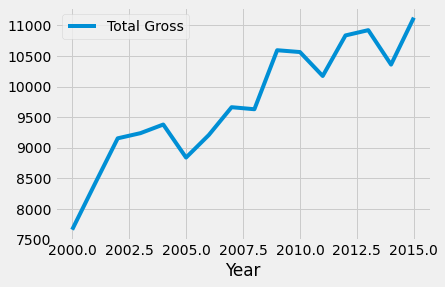

In [41]:
century_21.plot('Year', 'Total Gross')

The total domestic gross receipt was higher in 2009 than in 2008, even though there was a financial crisis and a much smaller number of movies were released.

One reason for this apparent contradiction is that people tend to go to the movies when there is a recession.

In 2009, another reason for high box office receipts was the movie Avatar and its 3D release. Not only was Avatar the #1 movie of 2009, it is also  the  highest grossing movie of all time:

In [42]:
century_21[century_21['Year'] == 2009]

,Year,Total Gross,Number of Movies,#1 Movie
6,2009,10595.5,521,Avatar


## Categorical Distribution ##

### Bar Chart

In [43]:
icecream = pd.DataFrame({
    'Flavor': np.array(['Chocolate', 'Strawberry', 'Vanilla']),
    'Number of Cartons': np.array([16, 5, 9])
})
icecream

,Flavor,Number of Cartons
0,Chocolate,16
1,Strawberry,5
2,Vanilla,9


<AxesSubplot:ylabel='Flavor'>

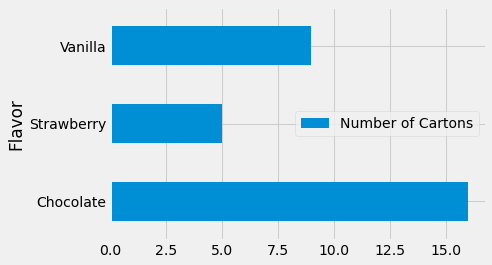

In [44]:
icecream.plot.barh('Flavor', 'Number of Cartons')

<AxesSubplot:ylabel='Flavor'>

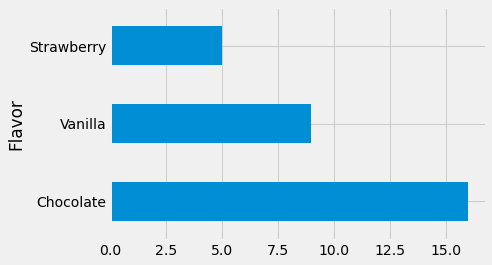

In [45]:
icecream.sort_values(by='Number of Cartons', ascending=False).plot.barh('Flavor', 'Number of Cartons', legend=False)

<AxesSubplot:xlabel='Flavor'>

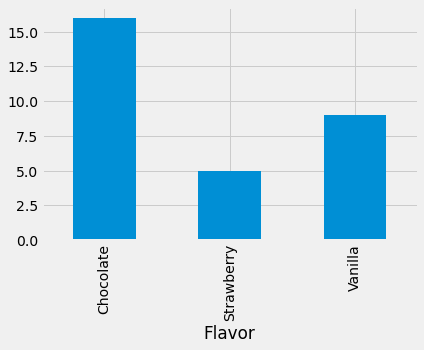

In [46]:
icecream.plot.bar('Flavor', 'Number of Cartons', legend=False)

<AxesSubplot:xlabel='Flavor'>

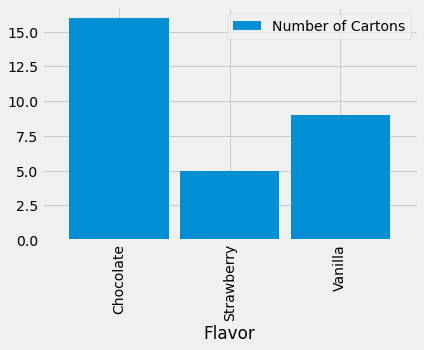

In [47]:
icecream.plot.bar('Flavor', 'Number of Cartons', width=0.9)

----------------



The table top consists of U.S.A.’s top grossing movies of all time. 
- Title: the title of the movie
- Studio: the studio that produced the movie. 
- Gross: the domestic box office gross in dollars
- Gross (Adjusted): the gross amount that would have been earned from ticket sales at 2016 prices. 
- Year: the release year of the movie.

In [48]:
top = pd.read_csv('top_movies_2017.csv')
top

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
4,Titanic,Paramount,658672302,1204368000,1997
...,...,...,...,...,...
195,9 to 5,Fox,103290500,341357800,1980
196,Batman v Superman: Dawn of Justice,Warner Brothers,330360194,340137000,2016
197,The Firm,Paramount,158348367,340028200,1993
198,Suicide Squad,Warner Brothers,325100054,339411900,2016


#### Grouping Categorical Data

In [54]:
studios = top[['Studio']]
studios

,Studio
0,MGM
1,Fox
2,Fox
3,Universal
4,Paramount
...,...
195,Fox
196,Warner Brothers
197,Paramount
198,Warner Brothers


In [55]:
studio_distribution = studios.groupby('Studio').size()
studio_distribution

Studio
AVCO                     1
Buena Vista             35
Columbia                 9
Disney                  11
Dreamworks               3
Fox                     24
IFC                      1
Lionsgate                3
MGM                      7
Metro                    1
NM                       1
Newline                  5
Orion                    1
Paramount               25
Paramount/Dreamworks     4
RKO                      3
Selz.                    1
Sony                     4
Sum.                     1
Tristar                  2
United Artists           6
Universal               23
Warner Brothers         29
dtype: int64

In [56]:
studio_distribution=pd.DataFrame(studio_distribution, columns=["Count"]).reset_index()
studio_distribution

,Studio,Count
0,AVCO,1
1,Buena Vista,35
2,Columbia,9
3,Disney,11
4,Dreamworks,3
5,Fox,24
6,IFC,1
7,Lionsgate,3
8,MGM,7
9,Metro,1


In [22]:
sum(studio_distribution['Count'])

200

<AxesSubplot:ylabel='Studio'>

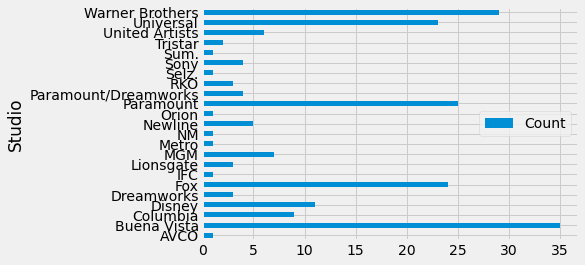

In [57]:
studio_distribution.plot.barh('Studio', 'Count')

<AxesSubplot:ylabel='Studio'>

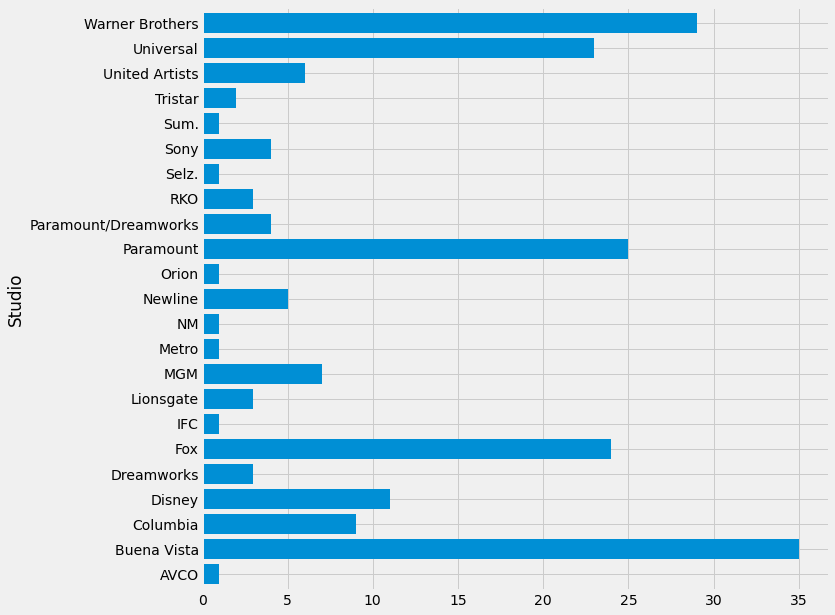

In [58]:
studio_distribution.plot.barh('Studio', 'Count', figsize=(10,10),legend=False, width=0.8)

<AxesSubplot:ylabel='Studio'>

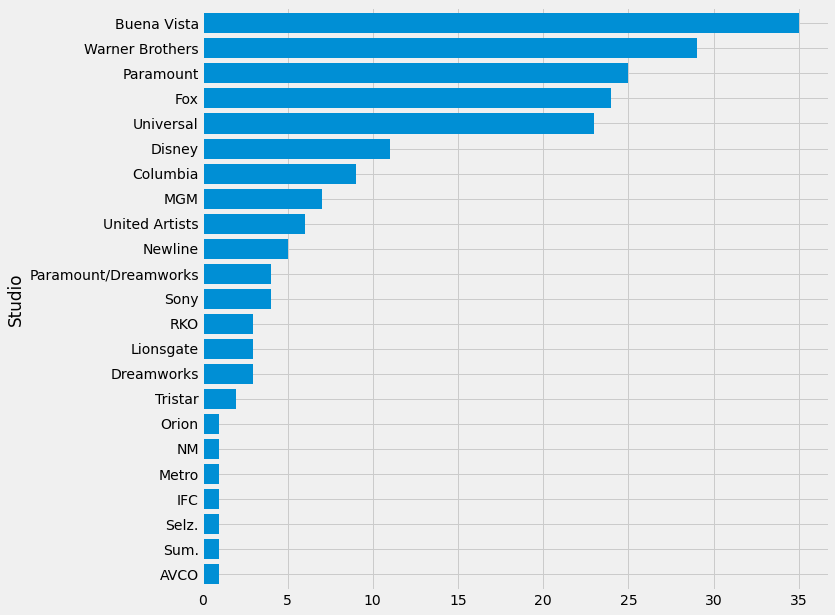

In [59]:
studio_distribution.sort_values(by='Count').plot.barh('Studio', 'Count', figsize=(10,10),legend=False, width=0.8)

<AxesSubplot:ylabel='Year'>

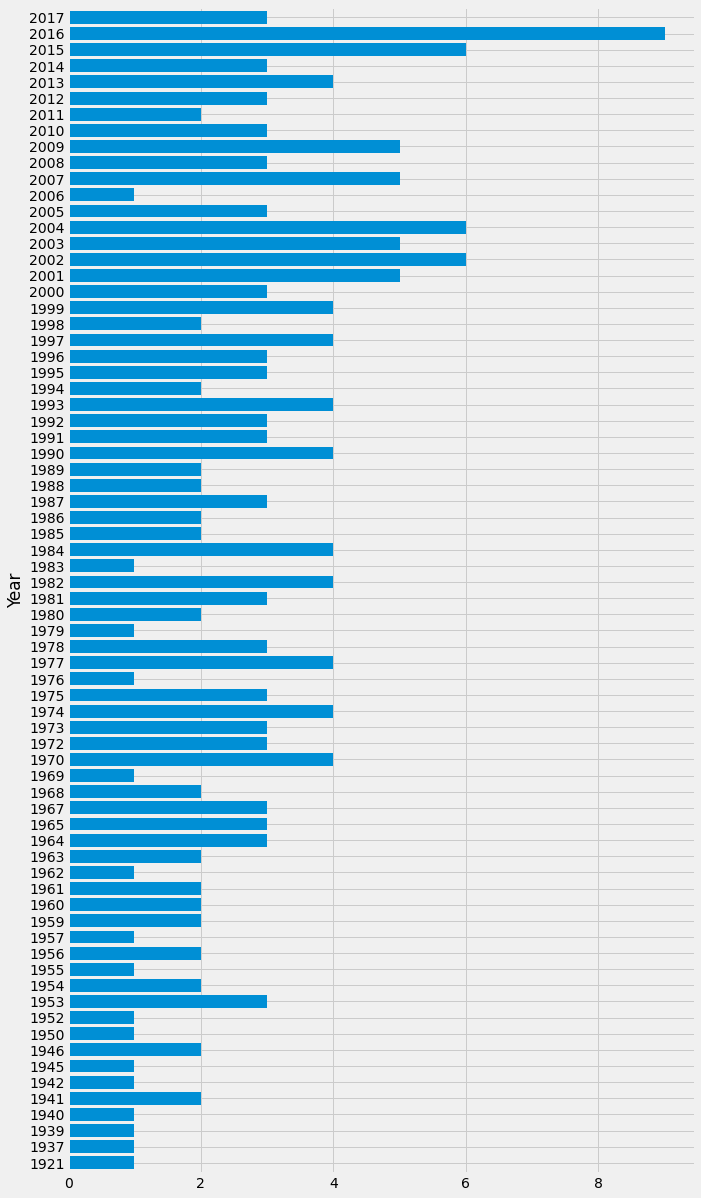

In [26]:
movies_and_years = top[['Year']]
movies_and_years=movies_and_years.groupby('Year').size().reset_index()
movies_and_years.plot.barh('Year', figsize=(10,20), legend=False, width=0.8)


## Next: Histograms ##